In [12]:
# Import Analysis Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [21]:
data = pd.read_csv('train.csv')
data.drop('id', axis=1, inplace=True)

data.head()



,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [40]:
print(data.shape)
print(data.isnull().sum())

(117564, 9)
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


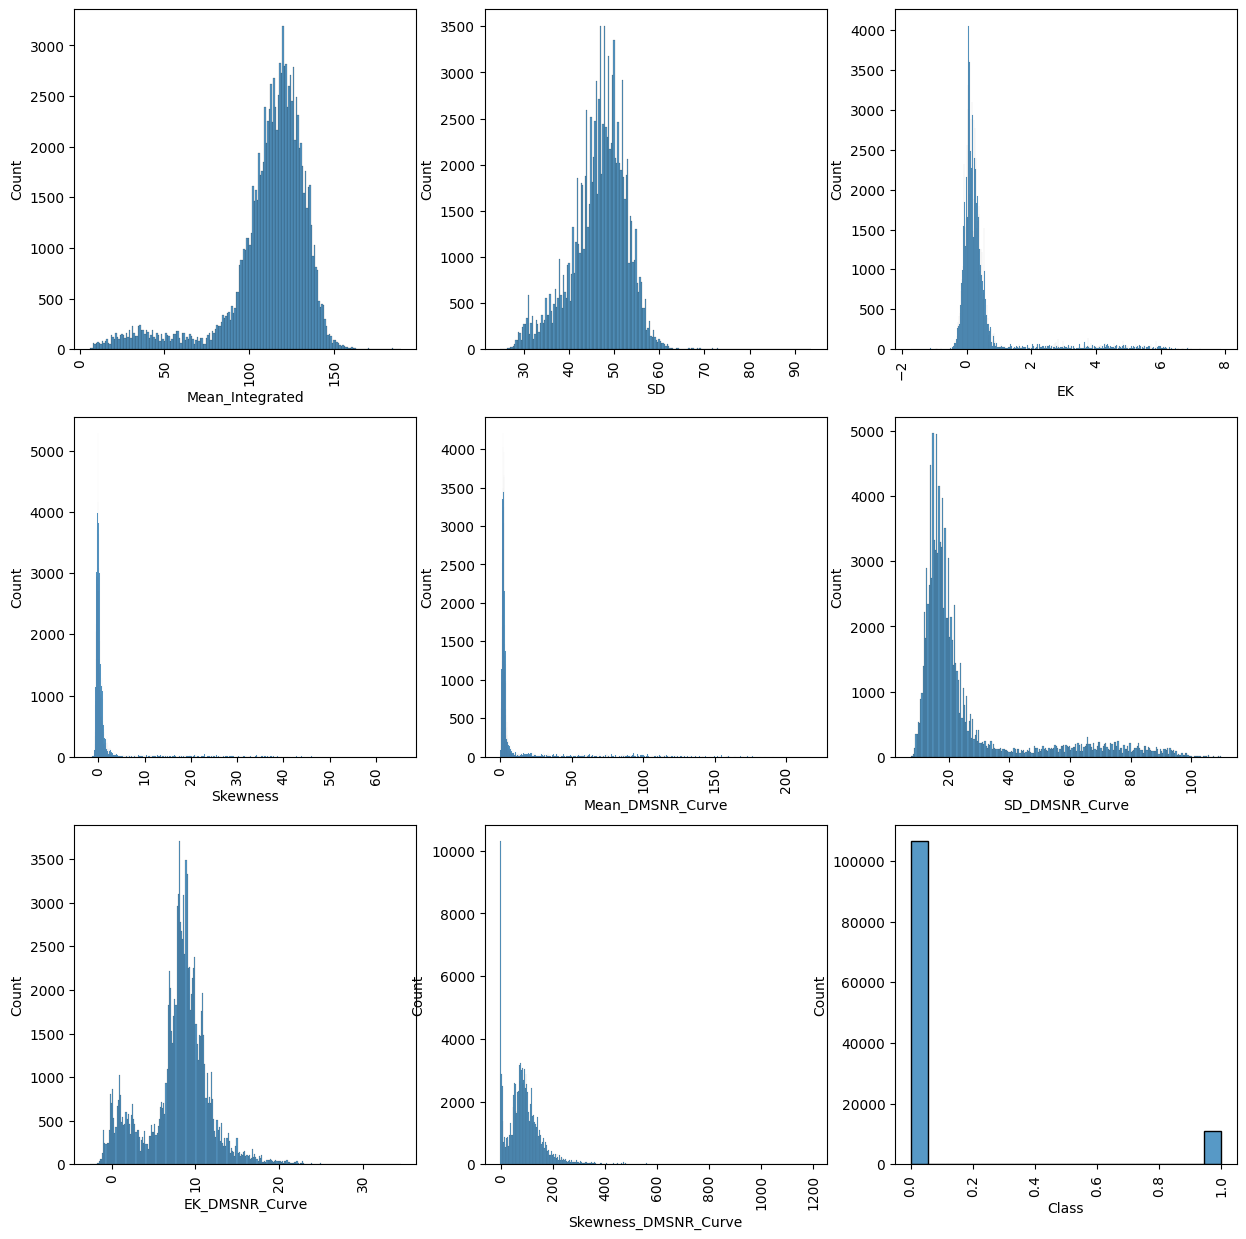

In [14]:
# Plot Distribution of Classes

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for variable, subplot in zip(data[1:].columns, ax.flatten()):
    sns.histplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [47]:
# Log Transform Data Except for Target Variable
psuedo = .01 # To avoid log(0)
data_transformed = np.log(data[data.columns[:-1]] + psuedo)

In [48]:
print(data_transformed.shape)
print(data_transformed.isnull().sum())

(117564, 8)
Mean_Integrated            0
SD                         0
EK                        59
Skewness                 163
Mean_DMSNR_Curve           0
SD_DMSNR_Curve             0
EK_DMSNR_Curve           369
Skewness_DMSNR_Curve    4378
dtype: int64


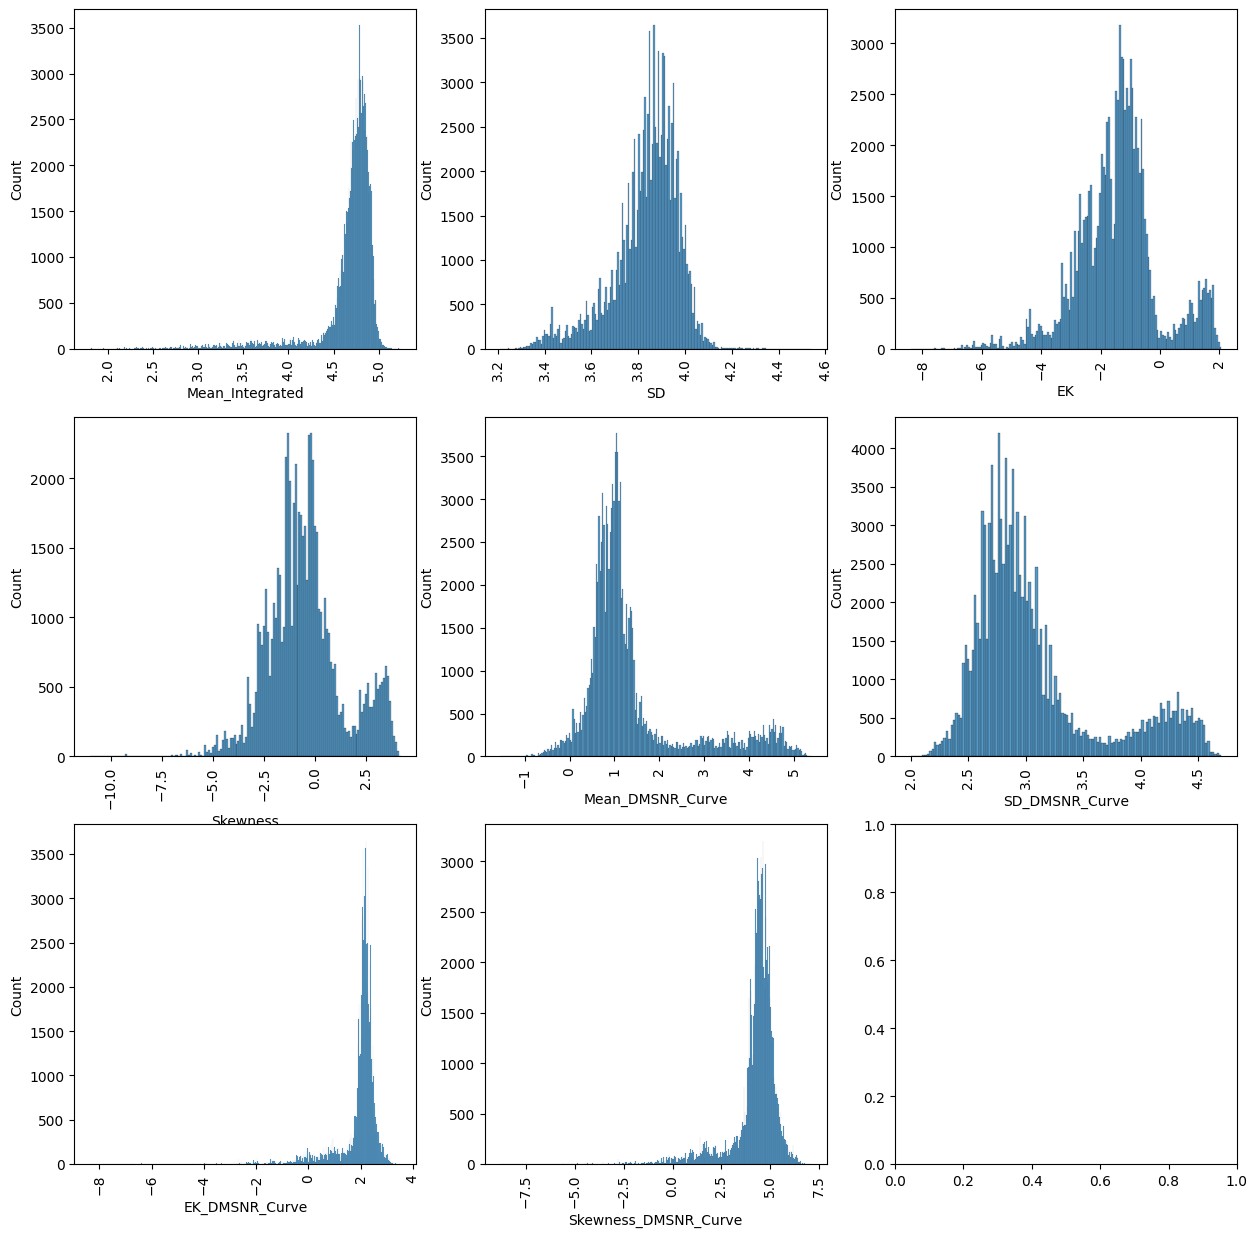

In [34]:
# Plot Distribution of Classes
fig, ax = plt.subplots(3, 3, figsize=(15, 15))


for variable, subplot in zip(data_transformed.columns, ax.flatten()):
    sns.histplot(data_transformed[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<AxesSubplot: >

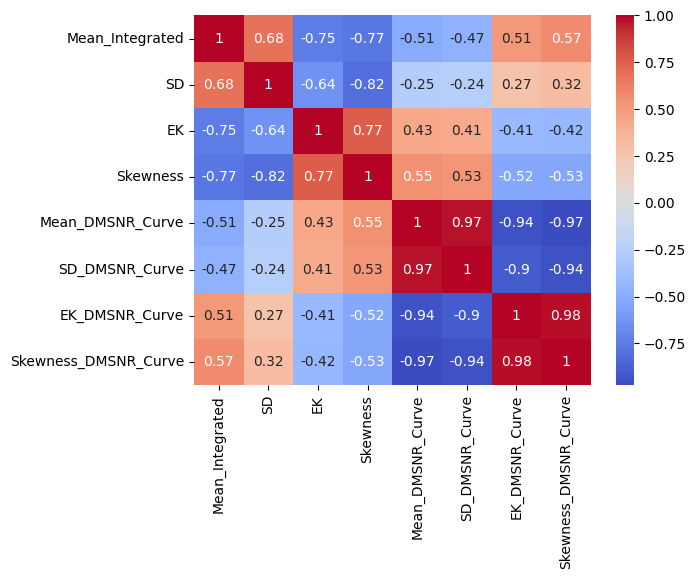

In [35]:
# Correlation Matrix

sns.heatmap(data_transformed.corr(), annot=True, cmap='coolwarm')

### Models / Data Splits

In [37]:
# Import Classification Packages

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Define X and y
X = data_transformed
y = data['Class']

# Split Data into Stratified K-Folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds.get_n_splits(X, y)

5

### Classification Models

In [39]:
# Logistic Regression

logistic = LogisticRegression()

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logistic.fit(X_train, y_train)
    y_pred = logistic.predict(X_test)
    print(accuracy_score(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [36]:
# Decision Tree

tree = DecisionTreeClassifier()

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print(accuracy_score(y_test, y_pred))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# Random Forest

forest = RandomForestClassifier()

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    print(accuracy_score(y_test, y_pred))

In [ ]:
# Gradient Boosting

g_boost = GradientBoostingClassifier()

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    g_boost.fit(X_train, y_train)
    y_pred = g_boost.predict(X_test)
    print(accuracy_score(y_test, y_pred))